In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('~/Documents/papers/iass-mcc-twitter-colab/data/all_parliamentarians_rule_annotated.csv',lineterminator='\n')
print(df.shape)
df = df[df['region']=="Bund"]
df.created_at = pd.to_datetime(df['created_at'])
df = df.set_index('created_at')
df.head()

(1927462, 7)


,id,text,author_id,region,party,parltype
created_at,,,,,,
2021-08-24 09:11:23+00:00,1430095381593985024,"@rainerfaus @bertpsch Ja, im Freundes- und Bek...",52024480,Bund,GRUENE,Bund
2021-09-02 07:35:26+00:00,1433332723985391616,"""Wir müssen Raum schaffen"", sagt Janecek, Raum...",52024480,Bund,GRUENE,Bund
2021-08-09 22:16:01+00:00,1424857024454696968,„Baerbocks Rede dreht sich zunächst vor allem ...,52024480,Bund,GRUENE,Bund
2021-08-24 06:42:55+00:00,1430058016997617683,"Ich freue mich, kommenden Montag die Spitzenka...",52024480,Bund,GRUENE,Bund
2021-06-21 22:08:05+00:00,1407098021989470218,Wenn der Technologieturbo so gut funktioniert ...,52024480,Bund,GRUENE,Bund


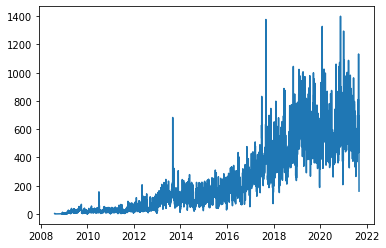

In [2]:
df.groupby(df.index.date)['id'].count().plot()

In [3]:
cdict = {'afd': '#009EE0',
 'bp': None,
 'cducsu': '#000000',
 'dp': None,
 'drp': None,
 'dzp': None,
 'fdp': '#FFED00',
 'fraktionslos': None,
 'gb/bhe': None,
 'gruene': '#64A12D',
 'kpd': None,
 'linke': '#8C3473',
 'other': None,
 'parteilos': None,
 'pds': None,
 'spd': '#EB001F',
 'wav': None}

In [4]:
# Tag documents according to whether they contain a keyword or not

gender_topics = [
    {"name": "Gender","keywords":[r"\bgender"]},
    {"name": "Geschlecht", "keywords": [r"\bgeschlecht"]}
]
for t in gender_topics:
    df[t["name"]] = 0
    for term in t["keywords"]:
        df.loc[df['text'].str.lower().str.contains(term),t["name"]] = 1

In [5]:
# Two dates to filter the data with

import datetime, pytz
cutoffs = [
    datetime.datetime(2017,10,24,tzinfo=pytz.UTC),
    datetime.datetime(2021,1,1,tzinfo=pytz.UTC)
]

17-10-24


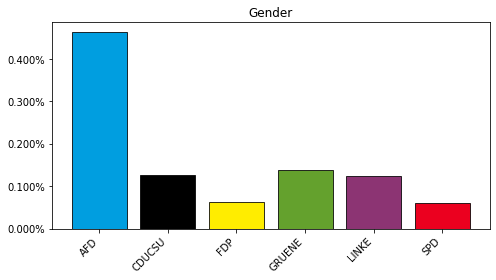

21-01-01


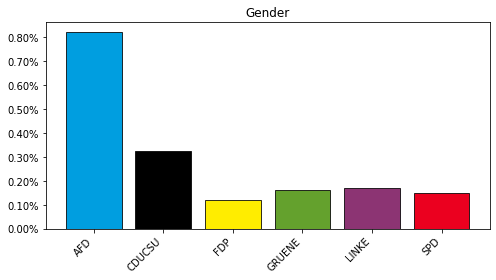

In [6]:
## 1. Proportion of each party's tweets using the term gender

topic = {"name":"Gender"}

for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    ticks = []
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup[topic['name']].sum()/pgroup.shape[0], 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )
        ticks.append(party)

    ax.set_title(topic["name"])
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")
    import matplotlib.ticker as mtick
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
        #break

    fig.tight_layout()
    plt.savefig(f"plots/1_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/1_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    plt.show()

In [7]:
for cutoff in cutoffs:
    results = df[df.index>cutoff].groupby('party')['Gender'].sum().to_frame().merge(
        df[df.index>cutoff].groupby('party')['id'].count().to_frame(),
        left_index=True,right_index=True
    ).rename(columns={
        "Gender":"Gender Tweets",
        "id": "All tweets"
    })
    results['party_gender_proportion'] = results['Gender Tweets'] / results['All tweets']
    results['proportion_of_gender_tweets'] = results['Gender Tweets'] / results['Gender Tweets'].sum()
    results.to_csv(f"results/1-3_after_{cutoff.strftime('%y-%m-%d')}.csv")

results


,Gender Tweets,All tweets,party_gender_proportion,proportion_of_gender_tweets
party,,,,
AFD,128,15596,0.008207,0.335079
CDUCSU,77,23603,0.003262,0.201571
FDP,34,28482,0.001194,0.089005
GRUENE,47,29136,0.001613,0.123037
LINKE,54,32140,0.001680,0.141361
SPD,42,28304,0.001484,0.109948


17-10-24


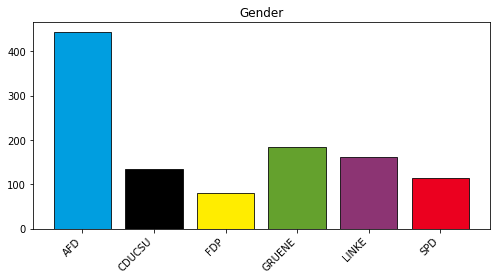

21-01-01


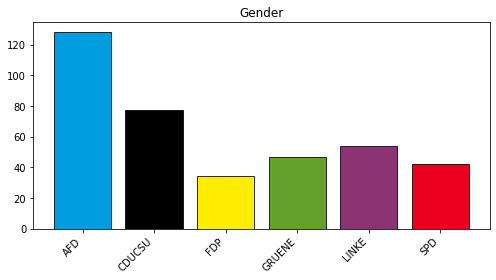

In [8]:
#2 Absolute number of tweets/posts using the term ‘gender’
for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup[topic['name']].sum(), 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )        
    ax.set_title(topic["name"])
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")   

    fig.tight_layout()
    plt.savefig(f"plots/2_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/2_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")

    plt.show()

17-10-24


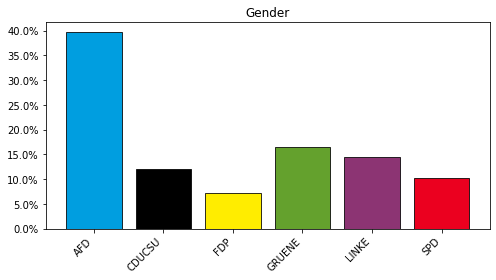

21-01-01


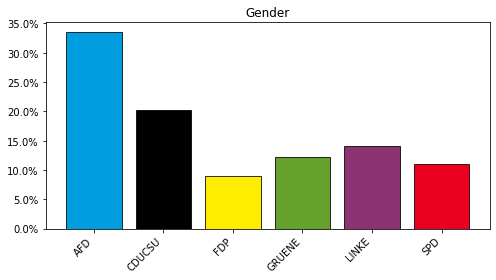

In [9]:
#3 Proportion of all the tweets/posts about ‘gender’, divided by party
for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup[topic['name']].sum()/df[df.index>cutoff][topic['name']].sum(), 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )        
    ax.set_title(topic["name"])
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    
    fig.tight_layout()
    plt.savefig(f"plots/3_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/3_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    plt.show()

In [10]:
#4 Which politicians are tweeting/posting about gender the most - load full mdb data

author_df = pd.read_csv('~/Documents/papers/iass-mcc-twitter-colab/data/all_parliamentarians.csv').rename(columns={"id":"author_id"})
author_df = author_df[author_df['region']=="Bund"]
noname = pd.isna(author_df['Name, Vorname'])
author_df.loc[noname,"Name, Vorname"] = author_df.loc[noname,"Nachname"] + ", " + author_df.loc[noname,"Vorname"]
noname = pd.isna(author_df['Name, Vorname'])
author_df.loc[noname,"Name, Vorname"] = author_df.loc[noname,"Vorname Nachname"]
author_df['Name, Vorname'] = author_df['Name, Vorname'].str.strip()

17-10-24


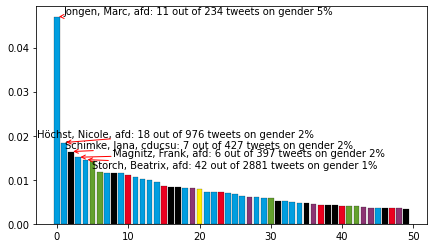

In [11]:
#4 
from adjustText import adjust_text

for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    
    authors = df[df.index>cutoff].groupby('author_id')['Gender'].aggregate(["count","sum"]).reset_index()
    authors['prop'] = authors['sum'] / authors['count']
    authors = authors.sort_values('prop',ascending=False).reset_index(drop=True).merge(author_df)
    
    sub_df = authors[(authors['prop']>0)].head(50)
    colors = [cdict[x.lower()] for x in sub_df.party]
    colors = [x if x is not None else "None" for x in colors]
    bars = ax.bar(sub_df.index, sub_df.prop,color=colors,ec="black",lw=0.2)

    texts = []

    for i, row in sub_df.head(5).iterrows():
        t = f"{row['Name, Vorname']}, {row['party']}: {row['sum']} out of {row['count']} tweets on gender {row['prop']:.0%}"
        texts.append(ax.text(i, row['prop'],t))
        
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
        
    plt.savefig(f"plots/4_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/4_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    
    authors.to_csv(f"results/4_gender_authors_after{cutoff.strftime('%y-%m-%d')}.csv")
        
    plt.show()
    
    break

In [12]:
# 5 What hashtags are most commonly used

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
regex = r'\B(?!#[0-9_]+\b)(#\w{2,30})\b'

for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))

    sub_df = df[(df.index>cutoff) & df["Gender"]==1].reset_index()

    vec =  CountVectorizer(min_df=1, token_pattern=regex)
    X = vec.fit_transform(sub_df.text)
    features = vec.get_feature_names()

    gender_hashtags = pd.DataFrame()
    gender_hashtags['hashtag'] = features

    for p in df.party.unique():
        idx = sub_df[sub_df.party==p].index
        fcounts = np.array(X[idx,:].sum(axis=0)).ravel()   
        gender_hashtags[p] = fcounts

    gender_hashtags.to_csv(f"results/5_common_gender_hashtags_after_{cutoff.strftime('%y-%m-%d')}.csv",index=False)

17-10-24
21-01-01


In [13]:
import spacy
nlp = spacy.load('de_core_news_sm')

def lemmatize(doc):
    doc = nlp(doc)
    result = ' '.join([x.lemma_ for x in doc if not x.is_stop and not x.lemma_=="der"]) 
    return result

In [14]:
# 5 What hashtags are most commonly used

df['clean_text'] = df.text.str.replace("(?:\@|https?\://)\S+", "").str.strip()
df['clean_text'] = df.clean_text.str.replace("&amp;","")

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
regex = r'\b(?<!#)(\w{2,30})\b'

for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))

    sub_df = df[(df.index>cutoff) & df["Gender"]==1].reset_index()
    sub_df['clean_text'] = sub_df['clean_text'].apply(lemmatize)

    vec = CountVectorizer(min_df=1, token_pattern=regex)

    X = vec.fit_transform(sub_df.clean_text)
    features = vec.get_feature_names()

    gender_hashtags = pd.DataFrame()
    gender_hashtags['hashtag'] = features

    for p in df.party.unique():
        print('\n',p,'\n')
        idx = sub_df[sub_df.party==p].index
        fcounts = np.array(X[idx,:].sum(axis=0)).ravel()   
        gender_hashtags[p] = fcounts
        sorted_counts = np.argsort(fcounts)
        for x in sorted_counts[-5:]:
            print(fcounts[x],features[x])

    gender_hashtags.to_csv(f"results/6_common_gender_terms_{cutoff.strftime('%y-%m-%d')}.csv",index=False)

17-10-24

 GRUENE 

28 mann
34 genderpaygap
49 ich
50 frau
61 gender

 LINKE 

20 gendern
33 genderpaygap
42 frau
43 ich
45 gender

 CDUCSU 

19 gendersternchen
27 sprache
33 gender
45 gendern
60 ich

 SPD 

24 to
26 frau
28 the
33 ich
49 gender

 AFD 

51 sprache
73 ich
84 afd
88 gendergaga
180 gender

 FDP 

14 sprache
14 frau
16 gendern
23 gender
26 ich
21-01-01

 GRUENE 

7 genderpaygap
11 gender
14 frau
17 ich
19 gendern

 LINKE 

11 gender
13 frau
14 sprache
16 ich
17 gendern

 CDUCSU 

9 mensch
11 gender
19 sprache
40 gendern
45 ich

 SPD 

10 and
12 the
14 gendern
15 ich
19 gender

 AFD 

23 gendergaga
25 sprache
29 afd
29 gendern
37 gender

 FDP 

4 gendergerechte
8 gender
9 ich
12 sprache
12 gendern


2017-10-24 00:00:00+00:00


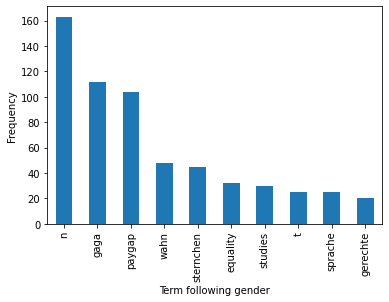

2021-01-01 00:00:00+00:00


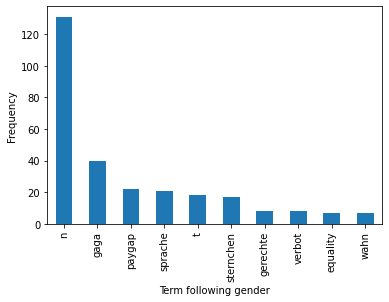

In [74]:
# What are the most commonly used words that come after gender for each party

for cutoff in cutoffs:
    print(cutoff)
    gterms = df[(df['Gender']==1) & (df.index>cutoff)].text.str.lower().str.extractall(r'\bgender {0,1}(\w*)').reset_index()
    fig, ax = plt.subplots()
    term_counts = gterms.groupby(0)['created_at'].count().sort_values(ascending=False)

    term_counts.head(10).plot.bar(ax=ax)
    ax.set_xlabel("Term following gender")
    ax.set_ylabel("Frequency")
    
    plt.savefig(f"plots/6_terms_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/6_terms_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    
    plt.show()



2017-10-24 00:00:00+00:00


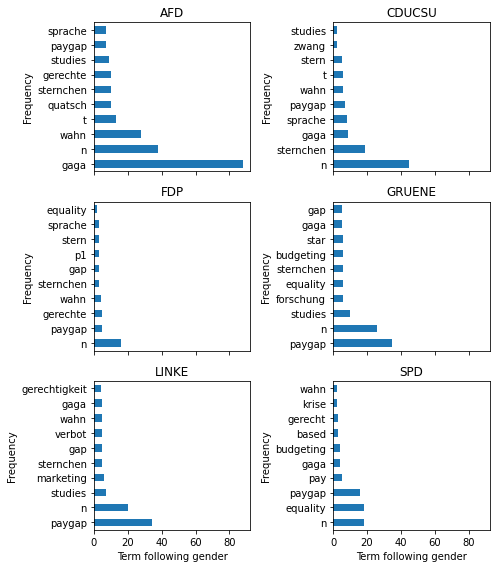

2021-01-01 00:00:00+00:00


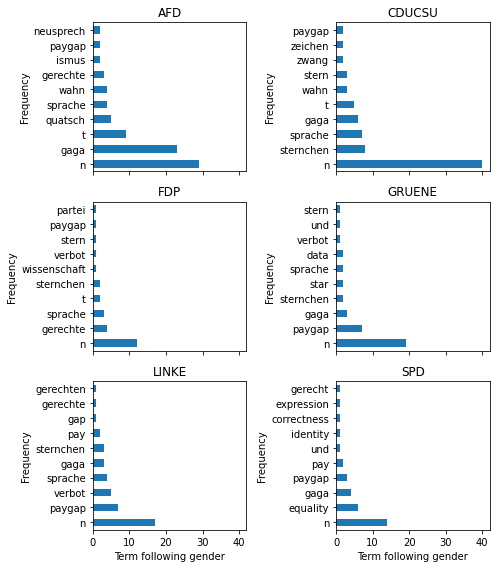

In [81]:
# What are the most commonly used words that come after gender for each party

for cutoff in cutoffs:
    print(cutoff)
    fig  = plt.figure(figsize=(7,8))
    
    ax = None
    
    for i, (party, pgroup) in enumerate(df[(df['Gender']==1) & (df.index>cutoff)].groupby('party')):
        gterms = pgroup.text.str.lower().str.extractall(r'\bgender {0,1}(\w*)').reset_index()

        ax = fig.add_subplot(3,2,i+1, sharex = ax)
        ax.set_title(party)

        term_counts = gterms.groupby(0)['created_at'].count().sort_values(ascending=False)

        term_counts.head(10).plot.barh(ax=ax)
        ax.set_xlabel("Term following gender")
        ax.set_ylabel("Frequency")
        
    fig.tight_layout()
    
    plt.savefig(f"plots/6_terms_party_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/6_terms_party_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    
    plt.show()



2017-10-24 00:00:00+00:00


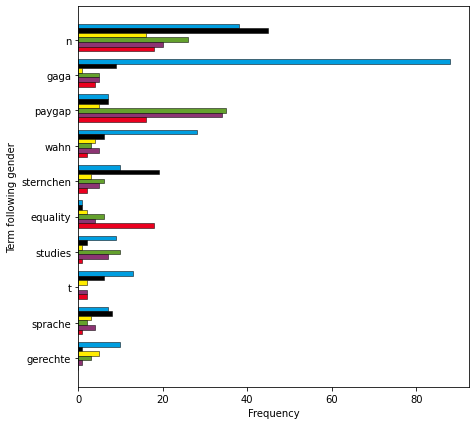

2021-01-01 00:00:00+00:00


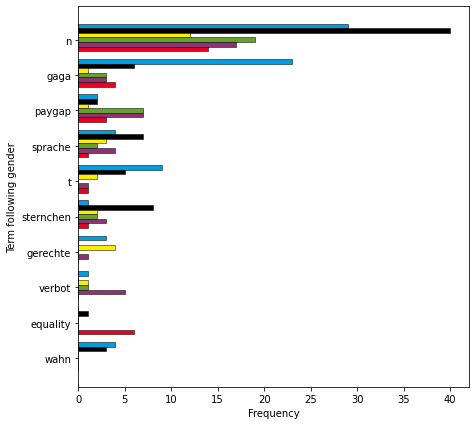

In [127]:
# What are the most commonly used words that come after gender for each party

n_terms = 10

for cutoff in cutoffs:
    print(cutoff)
    gterms = df[(df['Gender']==1) & (df.index>cutoff)].text.str.lower().str.extractall(r'\bgender {0,1}(\w*)').reset_index()
    fig, ax = plt.subplots(figsize=(7,7))
    term_counts = gterms.groupby(0)['created_at'].count().sort_values(ascending=False)

    for j, (party, pgroup) in enumerate(df[(df['Gender']==1) & (df.index>cutoff)].groupby('party')):
        gterms = pgroup.text.str.lower().str.extractall(r'\bgender {0,1}(\w*)').reset_index()
        p_term_counts = gterms.groupby(0)['created_at'].count().sort_values(ascending=False).to_frame()
        for i, (term, n) in enumerate(term_counts.head(n_terms).to_frame().iterrows()):
            try:
                x = p_term_counts[p_term_counts.index==term].created_at.values[0]
            except IndexError:
                x = 0
            ax.barh(i+j*0.13-0.39,x,height=0.13,color=cdict[party.lower()],ec="black",lw=0.5)

    ax.set_yticks(range(len(term_counts.head(n_terms).index)))
    ax.set_yticklabels(term_counts.head(n_terms).index)
    
    ax.set_ylabel("Term following gender")
    ax.set_xlabel("Frequency")
    
    ax = plt.gca()
    ax.set_ylim(ax.get_ylim()[::-1])
    
    plt.savefig(f"plots/6_top_terms_party_bars_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/6_top_terms_party_bars_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    
    plt.show()
    

In [131]:
# 7 Check words like Geschlecht
# Tag documents according to whether they contain a keyword or not

extended_gender_topics = [
    {"name": "Gender","keywords":[r"\bgender"]},
    {"name": "Geschlecht", "keywords": [r"geschlecht"]},
    {"name": "Feminismus","keywords":[r"feminismus"]},
    {"name": "Frauen", "keywords": [r"frauen"]},
    {"name": "Männer", "keywords": [r"männer"]}
]
for t in extended_gender_topics:
    df[t["name"]] = 0
    for term in t["keywords"]:
        df.loc[df['text'].str.lower().str.contains(term),t["name"]] = 1
        
df.head()

,id,text,author_id,region,party,parltype,Gender,Geschlecht,clean_text,Feminismus,Frauen,Männer
created_at,,,,,,,,,,,,
2021-08-24 09:11:23+00:00,1430095381593985024,"@rainerfaus @bertpsch Ja, im Freundes- und Bek...",52024480,Bund,GRUENE,Bund,0,0,"Ja, im Freundes- und Bekanntenkreis. In sozial...",0,0,0
2021-09-02 07:35:26+00:00,1433332723985391616,"""Wir müssen Raum schaffen"", sagt Janecek, Raum...",52024480,Bund,GRUENE,Bund,0,0,"""Wir müssen Raum schaffen"", sagt Janecek, Raum...",0,0,0
2021-08-09 22:16:01+00:00,1424857024454696968,„Baerbocks Rede dreht sich zunächst vor allem ...,52024480,Bund,GRUENE,Bund,0,0,„Baerbocks Rede dreht sich zunächst vor allem ...,0,0,0
2021-08-24 06:42:55+00:00,1430058016997617683,"Ich freue mich, kommenden Montag die Spitzenka...",52024480,Bund,GRUENE,Bund,0,0,"Ich freue mich, kommenden Montag die Spitzenka...",0,0,0
2021-06-21 22:08:05+00:00,1407098021989470218,Wenn der Technologieturbo so gut funktioniert ...,52024480,Bund,GRUENE,Bund,0,0,Wenn der Technologieturbo so gut funktioniert ...,0,0,0


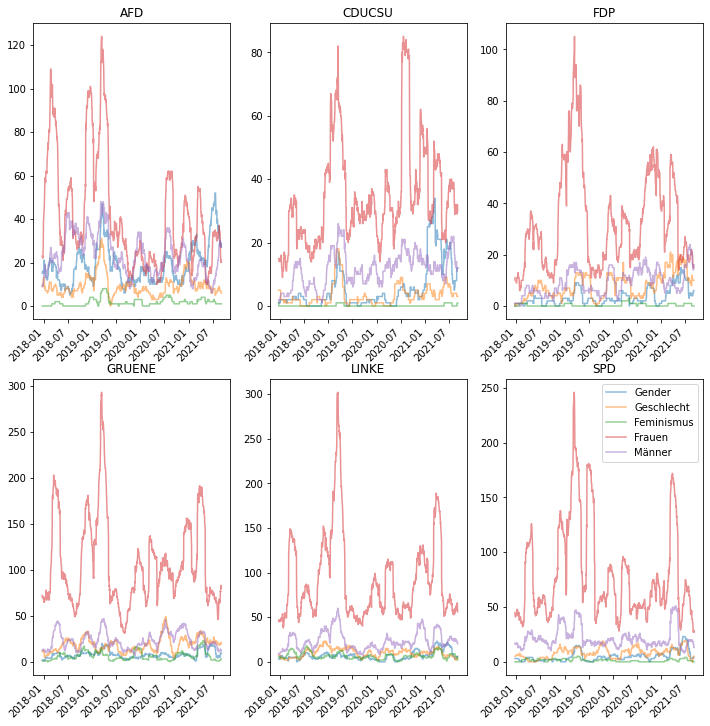

In [133]:
# 7. Check words like “Geschlecht” (including geschlechtergerecht etc.), „Feminismus“, „Frauen“, „Männer“

fig = plt.figure(figsize=(12,12))

ax = None

for i, (party, pgroup) in enumerate(df[df.index>cutoffs[0]].groupby('party')):
    ax = fig.add_subplot(2,3,i+1, sharex = ax)
    ax.set_title(party)
    for j, topic in enumerate(extended_gender_topics):
        counts = pgroup.groupby(pgroup.index.date)[topic['name']].sum()
        counts = counts.rolling(60).sum()
        ax.plot(counts, label=topic['name'],alpha=0.5)
        
    plt.draw()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        
        
ax.legend()
        
plt.savefig('plots/7_extended_terms.png',bbox_inches="tight")
plt.savefig('plots/7_extended_terms.pdf',bbox_inches="tight")

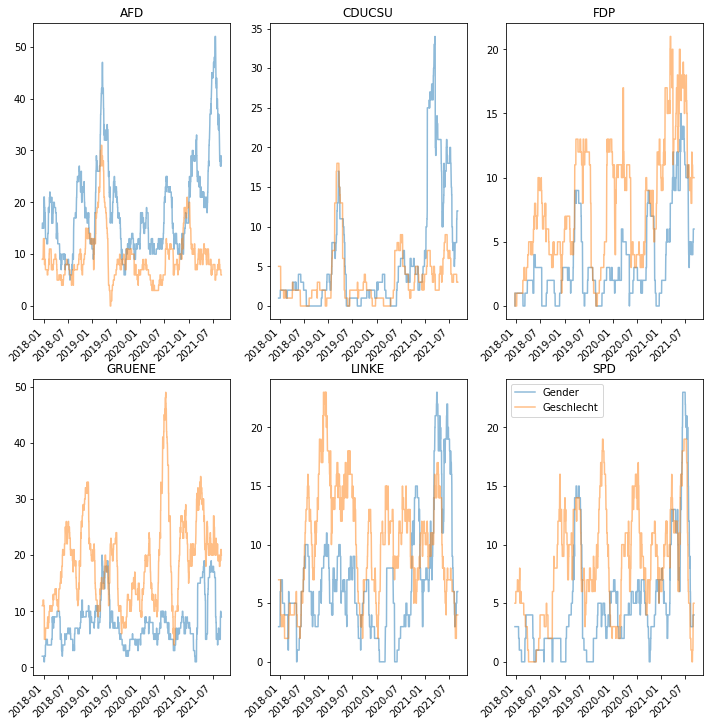

In [134]:
# 8. Timeline: how has use of “geschlecht” and “gender” changed over the last years

fig = plt.figure(figsize=(12,12))

ax = None

for i, (party, pgroup) in enumerate(df[df.index>cutoffs[0]].groupby('party')):
    ax = fig.add_subplot(2,3,i+1, sharex = ax)
    ax.set_title(party)
    for j, topic in enumerate(gender_topics):
        counts = pgroup.groupby(pgroup.index.date)[topic['name']].sum()
        counts = counts.rolling(60).sum()
        ax.plot(counts, label=topic['name'],alpha=0.5)
        
    plt.draw()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        
        
ax.legend()
        
plt.savefig('plots/8_timeline.png',bbox_inches="tight")
plt.savefig('plots/8_timeline.pdf',bbox_inches="tight")

In [137]:
# 7 Check words like Geschlecht
# Tag documents according to whether they contain a keyword or not

gendern_indicators = [":in",":innen","_in","_innen","*in","*innen"]
for t in gendern_indicators:
    df[t] = 0
    df.loc[df['text'].str.lower().str.contains(t,regex=False),t] = 1
    
df["tweet_genders"] = 0
df.loc[df[gendern_indicators].sum(axis=1)>0,"tweet_genders"] = 1
        
df.head()

,id,text,author_id,region,party,parltype,Gender,Geschlecht,clean_text,Feminismus,Frauen,Männer,:in,:innen,_in,_innen,*in,*innen,tweet_genders
created_at,,,,,,,,,,,,,,,,,,,
2021-08-24 09:11:23+00:00,1430095381593985024,"@rainerfaus @bertpsch Ja, im Freundes- und Bek...",52024480,Bund,GRUENE,Bund,0,0,"Ja, im Freundes- und Bekanntenkreis. In sozial...",0,0,0,0,0,0,0,0,0,0
2021-09-02 07:35:26+00:00,1433332723985391616,"""Wir müssen Raum schaffen"", sagt Janecek, Raum...",52024480,Bund,GRUENE,Bund,0,0,"""Wir müssen Raum schaffen"", sagt Janecek, Raum...",0,0,0,0,0,0,0,0,0,0
2021-08-09 22:16:01+00:00,1424857024454696968,„Baerbocks Rede dreht sich zunächst vor allem ...,52024480,Bund,GRUENE,Bund,0,0,„Baerbocks Rede dreht sich zunächst vor allem ...,0,0,0,0,0,0,0,0,0,0
2021-08-24 06:42:55+00:00,1430058016997617683,"Ich freue mich, kommenden Montag die Spitzenka...",52024480,Bund,GRUENE,Bund,0,0,"Ich freue mich, kommenden Montag die Spitzenka...",0,0,0,0,0,0,0,0,0,0
2021-06-21 22:08:05+00:00,1407098021989470218,Wenn der Technologieturbo so gut funktioniert ...,52024480,Bund,GRUENE,Bund,0,0,Wenn der Technologieturbo so gut funktioniert ...,0,0,0,0,0,0,0,0,0,0


In [148]:
df[df['tweet_genders']==1].head(10).text.values

array(['@GreenGerhard In der Tat werden viele Plakate beschmiert und zerstört. Das ist vor allem auch respektlos gegenüber den vielen ehrenamtlichen Helfer*innen. Nicht, dass es uns aufhalten würde. Dafür sind wir einfach zu gut gelaunt. 😁 https://t.co/b4IfXpJ7Wz',
       'Schwieriges Schuljahr ging heute zu Ende. Großer Dank an Eltern und Kinder, aber auch Lehrer*innen, die viel Druck und schwierige Situationen unter ungleichen Bedingungen bewältigen mussten. Mit Christian Ude u.a. habe ich für gute Vorbereitung fürs neue Schuljahr demonstriert. https://t.co/EoGDr49gxo',
       'Gerade tolles Gespräch mit Schüler*innen Realschule Pfaffenhofen u.a. über ihren Blick auf die Corona-Situation mit positiven wie negativen Erfahrungsberichten: Vereinsamung, Prüfungsangst, aber auch gelebte Solidarität. Sachlich, lösungsorientiert, emphatisch. Bitte mehr davon!',
       'In Münchens Altbausiedlungen ist ein verfügbarer Treppenlift eher die Ausnahme. Für die Agilität der Bewohner*innen sei die

17-10-24


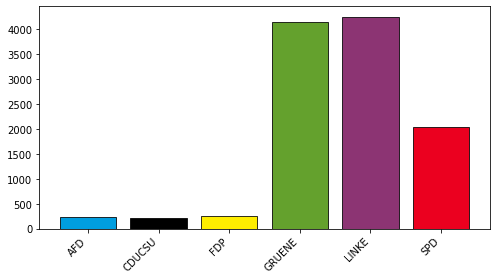

21-01-01


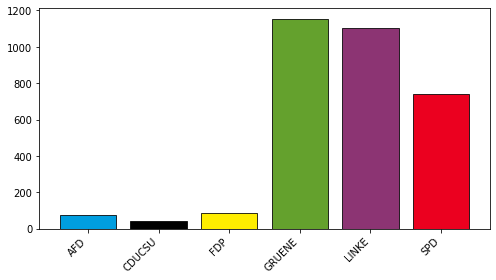

In [145]:
#9 9. Which party members use gender language the most?
for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup["tweet_genders"].sum(), 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )        
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")   

    fig.tight_layout()
    plt.savefig(f"plots/9_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/9_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")

    plt.show()

17-10-24


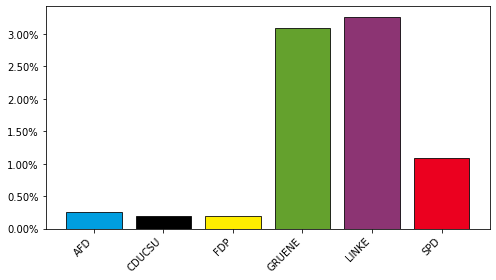

21-01-01


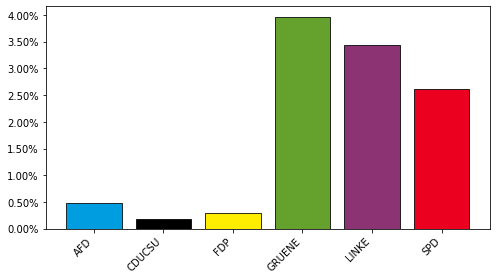

In [146]:
#9 9. Which party members use gender language the most?
for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup["tweet_genders"].sum()/pgroup['id'].count(), 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )        
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")   
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

    fig.tight_layout()
    plt.savefig(f"plots/9_pcnt_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/9_pcnt_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")

    plt.show()



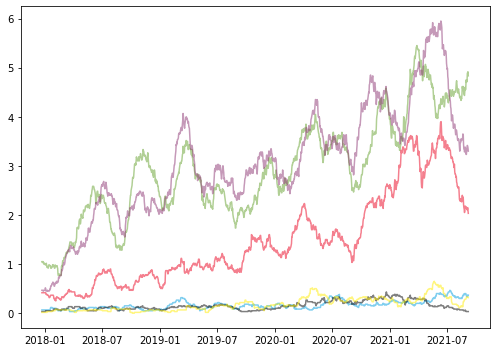

In [147]:
#9 9. Which party members use gender language the most?
fig, ax = plt.subplots(figsize=(7,5))

texts = []
for i, (party, group) in enumerate(df[df.index>cutoffs[0]].groupby('party')):
    counts = group.groupby(group.index.date)["tweet_genders"].sum()
    counts = counts.rolling(60).mean()
    ax.plot(counts, color=cdict[party.lower()],alpha=0.5)
    texts.append(counts[-1])
    
plt.savefig(f"plots/9_time.png", bbox_inches="tight")
plt.savefig(f"plots/9_time.pdf", bbox_inches="tight")

fig.tight_layout()

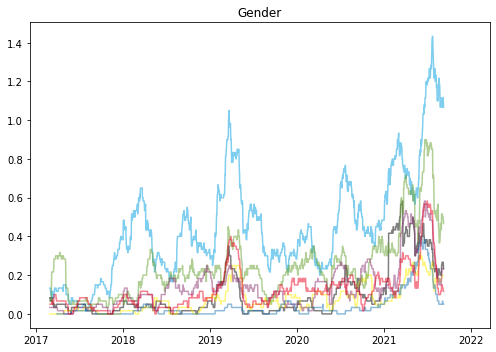

In [4]:

fig, ax = plt.subplots(figsize=(7,5))
from adjustText import adjust_text


offsets = [-0.2,.2]
ls = ["-","--"]

topic = {"name":"Gender"}

cutoff = datetime.datetime(2017,1,1,tzinfo=pytz.UTC)

ticks = []
texts = []
for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
    counts = group.groupby(group.index.date)[topic["name"]].sum()
    counts = counts.rolling(60).mean()
    ax.plot(counts, color=cdict[party.lower()],alpha=0.5)
    texts.append(counts[-1])
    
#adjust_text(texts,only_move={"points":"y","texts":"xy"})
    
ax.set_title(topic["name"])
#ax.set_xticks([])
ax.set_xlim(xmax=ax.get_xlim()[1]*1.00015)

    
    #break
    
fig.tight_layout()

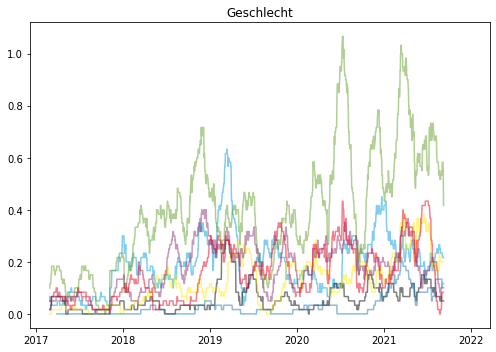

In [5]:
import datetime, pytz
fig, ax = plt.subplots(figsize=(7,5))
from adjustText import adjust_text


offsets = [-0.2,.2]
ls = ["-","--"]

topic = {"name":"Geschlecht"}

cutoff = datetime.datetime(2017,1,1,tzinfo=pytz.UTC)

ticks = []
texts = []
for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
    counts = group.groupby(group.index.date)[topic["name"]].sum()
    counts = counts.rolling(60).mean()
    ax.plot(counts, color=cdict[party.lower()],alpha=0.5)
    texts.append(counts[-1])
    
#adjust_text(texts,only_move={"points":"y","texts":"xy"})
    
ax.set_title(topic["name"])
#ax.set_xticks([])
ax.set_xlim(xmax=ax.get_xlim()[1]*1.00015)

    
    #break
    
fig.tight_layout()

In [6]:
import numpy as np
alt_texts = np.array([])
for t in texts:
    if alt_texts.shape[0]>0:
        while min(abs(t-alt_texts))<0.05:
            min_el = np.argmin(abs(t-alt_texts))
            if t-alt_texts[min_el] < 0:
                t-=0.01
                alt_texts[min_el]+=0.01
            else:
                t+=0.01
                alt_texts[min_el]-=0.01
    alt_texts = np.append(alt_texts,t) 
    

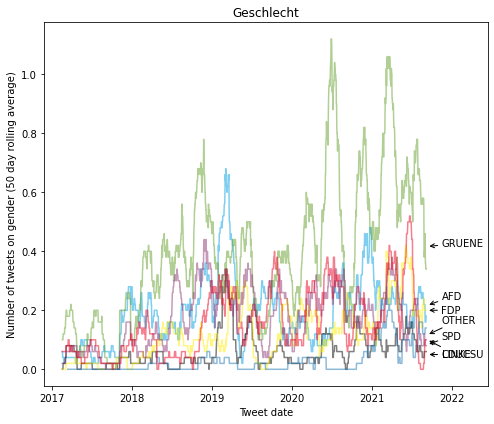

In [7]:
fig, ax = plt.subplots(figsize=(7,6))


for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
    counts = group.groupby(group.index.date)[topic["name"]].sum()
    counts = counts.rolling(50).mean()
    ax.plot(counts, color=cdict[party.lower()],alpha=0.5)
    x = counts.index[-1]+datetime.timedelta(days=5)
    ax.annotate(
        party,(x,texts[i]),(x+datetime.timedelta(days=65),alt_texts[i]),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
    )
    
ax.set_title(topic["name"])
ax.set_xlim(xmax=counts.index[-1]+datetime.timedelta(days=280))

ax.set_xlabel('Tweet date')
ax.set_ylabel('Number of tweets on gender (50 day rolling average)')

fig.tight_layout()

/home/max/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


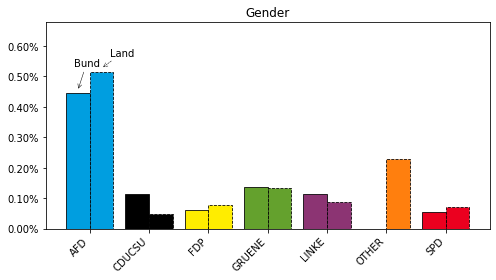

In [8]:
fig, ax = plt.subplots(figsize=(7,4))

offsets = [-0.2,.2]
ls = ["-","--"]

topic = {"name":"Gender"}

ticks = []
for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
    for k, bl in enumerate(["Bund","Land"]):
        pgroup = group[group["parltype"]==bl]
        ax.bar(
            i+offsets[k], pgroup[topic['name']].sum()/pgroup.shape[0], 
            color=cdict[party.lower()], width=0.4, linestyle=ls[k], lw=0.8,ec="black"
        )
        if i==0:
            ax.annotate(
                bl, (i+offsets[k],pgroup[topic['name']].sum()/pgroup.shape[0]*1.02),
                (i+0.25+offsets[k]*1.5,pgroup[topic['name']].sum()/pgroup.shape[0]*(1.2+-0.1*k)),
                arrowprops=dict(arrowstyle="->", linestyle=ls[k], lw=0.5,
                                connectionstyle="arc3"),
                ha="center"

            )
    ticks.append(party)
    
ax.set_ylim(ymax = ax.get_ylim()[1]*1.25)
ax.set_title(topic["name"])
#ax.set_xticks([])
ax.set_xticks(range(len(ticks)))
ax.set_xticklabels(ticks, rotation=45,ha="right")
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    #break
    
fig.tight_layout()

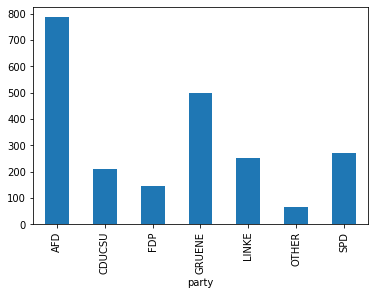

In [9]:
df[df['Gender']==1].groupby('party')['id'].count().plot.bar()

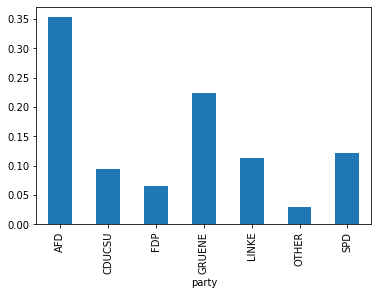

In [10]:
gprops = df[df['Gender']==1].groupby('party')['id'].count()/df['Gender'].sum()
gprops.plot.bar()

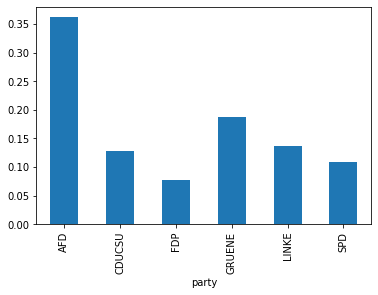

In [11]:
gprops = df[(df['region']=="Bund")].groupby('party')['Gender'].sum()/df[(df['region']=="Bund")]['Gender'].sum()
gprops.plot.bar()

In [12]:
authors = df.groupby('author_id')['Gender'].aggregate(["count","sum"]).reset_index()
authors['prop'] = authors['sum'] / authors['count']
authors = authors.sort_values('prop',ascending=False).reset_index(drop=True)

author_df = pd.read_csv('data/all_parliamentarians.csv').rename(columns={"id":"author_id"})
noname = pd.isna(author_df['Name, Vorname'])
author_df.loc[noname,"Name, Vorname"] = author_df.loc[noname,"Nachname"] + ", " + author_df.loc[noname,"Vorname"]
noname = pd.isna(author_df['Name, Vorname'])
author_df.loc[noname,"Name, Vorname"] = author_df.loc[noname,"Vorname Nachname"]
author_df['Name, Vorname'] = author_df['Name, Vorname'].str.strip()

authors = authors.merge(author_df)


for i, row in authors.head(8).iterrows():
    print("\n###########\n###########\n",row['Name, Vorname'],", ",row['party']," - ",row["region"])
    tweets = df[(df['author_id']==row['author_id']) & (df['Gender']==1)]
    for j, t in tweets.head().iterrows():
        print(t['text'])

authors


###########
###########
 Auricht, Jeannette ,  AfD  -  Berlin
Anne Will, Anne darf, Anne hat die Sendezeit. Und in dieser Zeit bringt die Moderatorin ihren Zuschauern jetzt das #Gendern bei.

Und dafür zahle ich den #Rundfunkbeitrag? Unfassbar!

https://t.co/D4YZMUpxvj
#Rundfunk #AnneWill #AfD https://t.co/Ankv9uPprM
Siehe da: Auch einige (wenige) Journalisten wundern sich über die Sprachvergewaltigung der #Gender-Sprache im öffentlich-rechtlichen Fernsehen: 
https://t.co/WtkBYc4yfe
#AnneWill #ARD #ZDF
#HarryPotter-Autorin #JKRowling spricht sich gegen Gendertheorie aus und der linke Shitstorm bricht über sie herein. Wie kann sie es nur wagen, Männern ihre Menstruation abzusprechen 🤦🏻‍♀️
https://t.co/4kuNeGzd5w
#AfD #Gender #Gendergaga https://t.co/RL6eEl2plQ

###########
###########
 Rose, Dr. Stephanie ,  Linke  -  Hamburg
Die Krise ist genau der richtige Zeitpunkt, um gender- und queerwissenschaftliche Strukturen in #Hamburg zu stärken und auszubauen. Die Genderwissenschaften müsse

,author_id,count,sum,prop,Nachname,Vorname,Fraktion,Twitter-Name,region,"Name, Vorname",Vorname Nachname,handle,party,parltype,person__in_parlperiod,lcasehandle
0,826402742893760512,32,3,0.093750,NaN,NaN,AFD,@JeanetteAuricht,Berlin,"Auricht, Jeannette",NaN,JeanetteAuricht,AfD,Land,NaN,jeanetteauricht
1,1250426686270660608,237,10,0.042194,Rose,Dr. Stephanie,DIE LINKE,@dielinke_rose,Hamburg,"Rose, Dr. Stephanie",NaN,dielinke_rose,Linke,Land,NaN,dielinke_rose
2,4121053541,321,12,0.037383,Jongen,Marc,NaN,NaN,Bund,"Jongen, Marc",NaN,Marc_Jongen,afd,Bund,[19],marc_jongen
3,4861233617,30,1,0.033333,NaN,NaN,CDU,@TobiasvdHeide,Schleswig-Holstein,Tobias von der Heide,Tobias von der Heide,TobiasvdHeide,CDUCSU,Land,NaN,tobiasvdheide
4,136561804,2083,61,0.029285,Dobusch,Gabi,SPD,@gdobusch,Hamburg,"Dobusch, Gabi",NaN,gdobusch,SPD,Land,NaN,gdobusch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,397443675,3178,0,0.000000,Abaci,Kazim,SPD,@KazimAbaci,Hamburg,"Abaci, Kazim",NaN,KazimAbaci,SPD,Land,NaN,kazimabaci
1254,398248240,2076,0,0.000000,von Brunn,Florian,SPD,@FlorianvonBrunn,Bayern,"von Brunn, Florian",NaN,FlorianvonBrunn,SPD,Land,NaN,florianvonbrunn
1255,399257453,731,0,0.000000,Kohler,Jochen,CSU,@KohlerJochen,Bayern,"Kohler, Jochen",NaN,KohlerJochen,CDUCSU,Land,NaN,kohlerjochen
1256,409203792,5859,0,0.000000,Schummer,Uwe,NaN,NaN,Bund,"Schummer, Uwe",NaN,UweSchummer,cducsu,Bund,"[17, 18, 19, 15, 16]",uweschummer


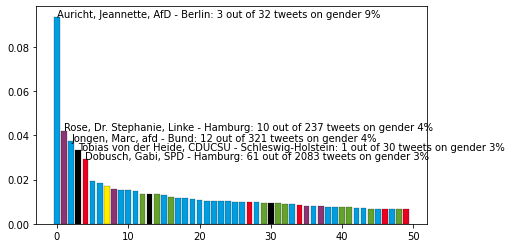

In [13]:
fig, ax = plt.subplots(figsize=(7,4))
sub_df = authors[authors['prop']>0].head(50)
colors = [cdict[x.lower()] for x in sub_df.party]
colors = [x if x is not None else "None" for x in colors]
bars = ax.bar(sub_df.index, sub_df.prop,color=colors,ec="black",lw=0.2)

texts = []

for i, row in sub_df.head(5).iterrows():
    t = f"{row['Name, Vorname']}, {row['party']} - {row['region']}: {row['sum']} out of {row['count']} tweets on gender {row['prop']:.0%}"
    texts.append(ax.text(i, row['prop'],t))
    
    


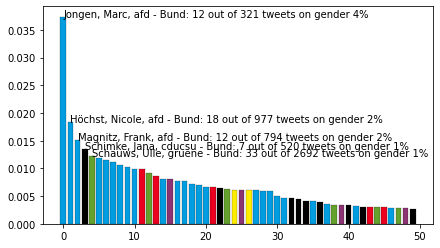

In [14]:
fig, ax = plt.subplots(figsize=(7,4))
sub_df = authors[(authors['prop']>0) & (authors['region']=="Bund")].reset_index().head(50)
colors = [cdict[x.lower()] for x in sub_df.party]
colors = [x if x is not None else "None" for x in colors]
bars = ax.bar(sub_df.index, sub_df.prop,color=colors,ec="black",lw=0.2)

texts = []

for i, row in sub_df.head(5).iterrows():
    t = f"{row['Name, Vorname']}, {row['party']} - {row['region']}: {row['sum']} out of {row['count']} tweets on gender {row['prop']:.0%}"
    texts.append(ax.text(i, row['prop'],t))
    
    


In [15]:
authors = authors.rename(columns={"count":"n_tweets","sum":"n_gender_tweets","prop":""})
authors.to_csv('data/politicians_gender.csv',index=False)

In [16]:
df[df['Gender']==1].reset_index()[["id","text","author_id","created_at"]].merge(authors).sort_values('author_id').to_csv('data/gender_tweets.csv',index=False)